## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.isna().mean()

alcohol                         0.0
malic_acid                      0.0
ash                             0.0
alcalinity_of_ash               0.0
magnesium                       0.0
total_phenols                   0.0
flavanoids                      0.0
nonflavanoid_phenols            0.0
proanthocyanins                 0.0
color_intensity                 0.0
hue                             0.0
od280/od315_of_diluted_wines    0.0
proline                         0.0
dtype: float64

***Вывод:***
Получаем, что пропущенных значений в признаках нет.
Категориальных признаков нет, есть только числовые. К тому же это информация указаны к описанию датасета.

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [4]:
from sklearn.model_selection import train_test_split

Вместо `np.random.seed()` будем фиксировать параметр `random_state` в функции `train_test_split`. Ссылка на статью об эквивалентности этих методов [здесь](https://limitlessdatascience.wordpress.com/2019/02/18/use-of-numpy-random-seed-and-random_state-in-train_test-split-function/).

In [5]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [7]:
X_train = X_train_raw[['alcohol', 'magnesium']]
X_test = X_test_raw[['alcohol', 'magnesium']]

Масштабируем признаки:

In [8]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

Обучаем классификаторы:

In [9]:
clf_1 = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
clf_2 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
clf_3 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
clf_4 = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
clf_5 = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
clf_6 = KNeighborsClassifier(n_neighbors=25, metric='euclidean')
classifiers = [clf_1, clf_2, clf_3, clf_4, clf_5, clf_6]

print('N\tTrain\tTest')
for clf in classifiers:
    clf.fit(X_train_norm, y_train)
    y_predicted_train = clf.predict(X_train_norm)
    y_predicted_test = clf.predict(X_test_norm)
    print(clf.n_neighbors, np.mean(y_train == y_predicted_train).round(2), np.mean(y_test == y_predicted_test).round(2), sep='\t')


N	Train	Test
1	0.99	0.67
3	0.84	0.65
5	0.81	0.69
10	0.81	0.7
15	0.78	0.69
25	0.73	0.69


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/).

In [10]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [11]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

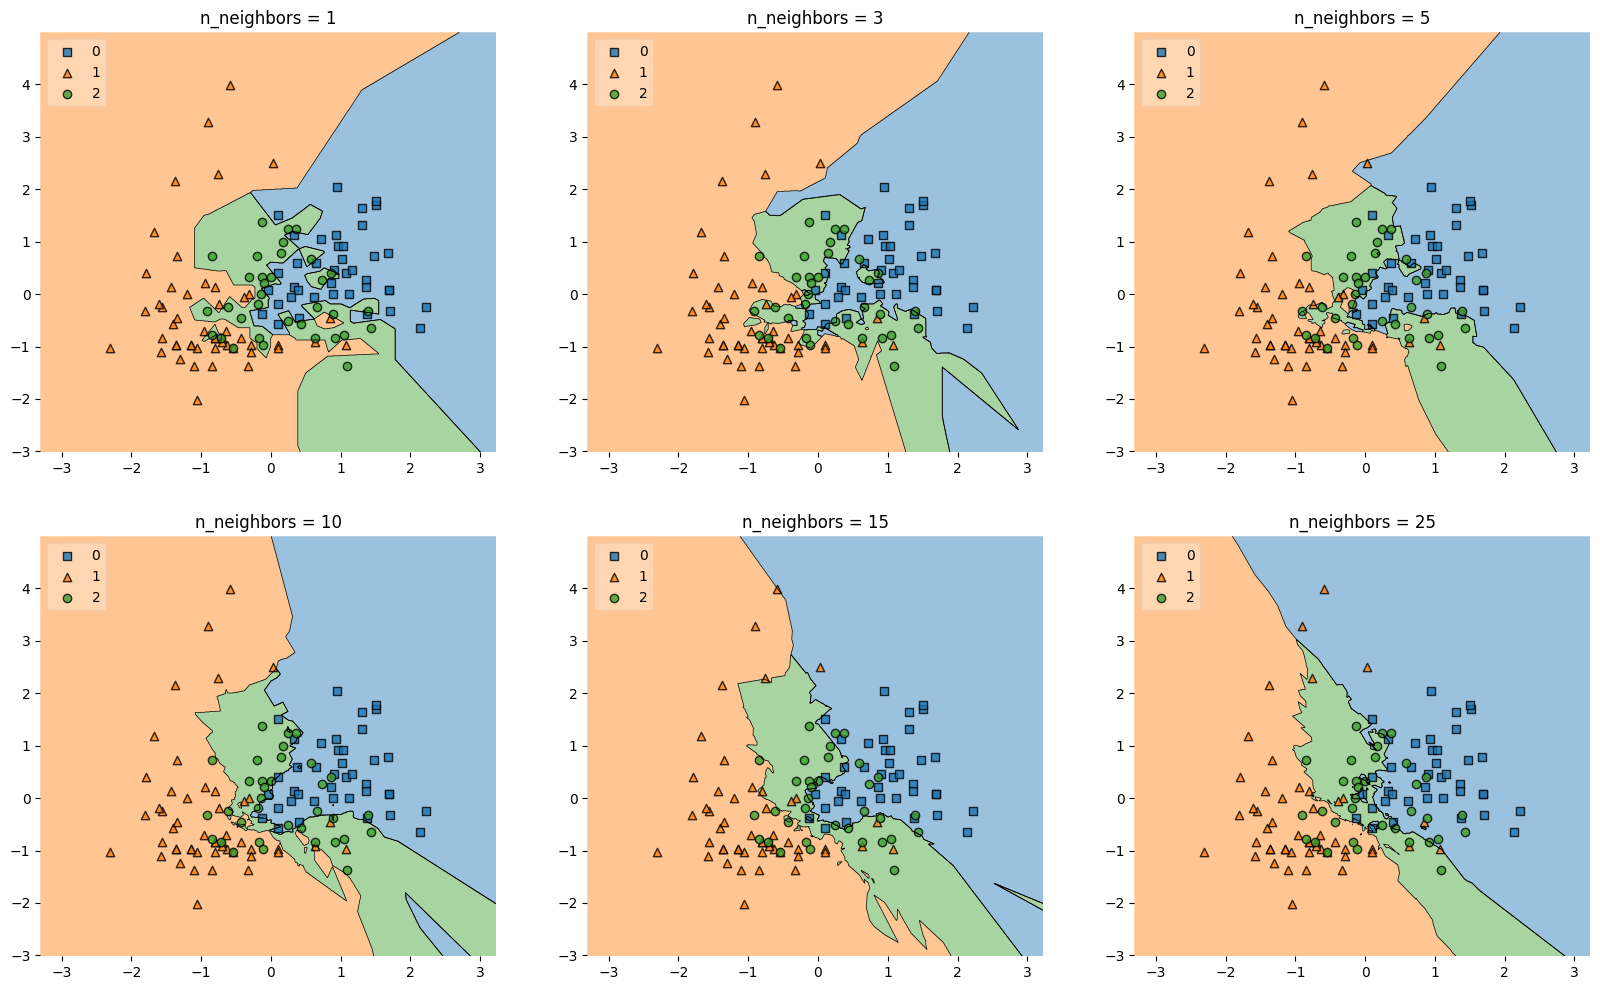

In [12]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(20, 12))

labels = ['n_neighbors = 1', 'n_neighbors = 3', 'n_neighbors = 5', 'n_neighbors = 10',
          'n_neighbors = 15', 'n_neighbors = 25']
for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):

    clf.fit(X_train_norm, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_norm, y=y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

***Выводы***: *самое оптимальное количество соседей - 10*, так как на тесте оно показывает самую лучшую долю верных ответов. Кроме того на соответствующем графике гиперплоскости разделены более четко, чем на первых трёх (1, 3 и 5 соседей), где модель переобучается, то есть сильно подстраивается под наши объекты. На графиках с 15 и 25 соседями модель начинает заезжать на территорию других классов, то есть начинает относить некоторые объекты разных классов к одному.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

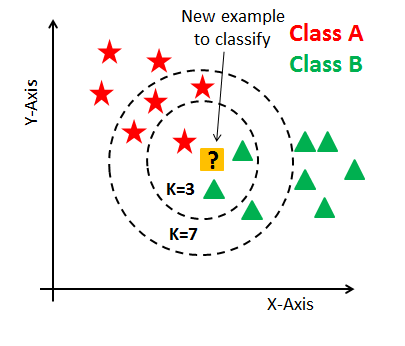

In [13]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
        self.X = X
        self.y = y
        pass
    
    def predict(self, X):
        
        def predict_for_all(test_obj):
            distance = np.sqrt(np.sum(np.square(self.X - test_obj), axis=1))
            args = np.argsort(distance)[:self.k]
            n_neighbors_target = self.y[args]
            target = np.bincount(n_neighbors_target).argmax()
            return target
                
        return np.apply_along_axis(predict_for_all, 1, X)
        pass

In [14]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [15]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [16]:
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2021/homeworks/hw04-knn_linreg/data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [17]:
data.isna().mean() #пропущенных значений нет

Unnamed: 0    0.0
carat         0.0
cut           0.0
color         0.0
clarity       0.0
depth         0.0
table         0.0
price         0.0
x             0.0
y             0.0
z             0.0
dtype: float64

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [18]:
data = data.drop('Unnamed: 0', axis=1)
data.head(3)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [19]:
data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


Наиболее сильно с целевой переменной коррелируют признаки: **carat** и размеры -  **x, y, z**

In [20]:
# достанем целевую переменную
y = data['price']
data = data.drop('price', axis=1)

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [21]:
data_dum = pd.get_dummies(data, drop_first=True)

**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(data_dum, y, random_state=42, test_size=0.3)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [23]:
normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train_norm, y_train)
y_train_pred = lr.predict(X_train_norm)
y_test_pred = lr.predict(X_test_norm)
print("Train\t\tTest")
print(mean_squared_error(y_train, y_train_pred).round(3), mean_squared_error(y_test, y_test_pred).round(3), sep="\t")

Train		Test
1290541.915	1244765.436


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [25]:
lr.coef_

array([ 5338.61567061,   -90.17381703,   -60.33227991, -1100.41885004,
          -6.45891672,   -34.25894462,   170.60293265,   414.36951486,
         339.23920411,   310.65425625,   -83.64002086,  -104.56099268,
        -202.86356354,  -362.00229958,  -442.78356742,  -529.44921589,
         975.93364117,  1611.5716809 ,  1042.92121499,  1670.31849636,
        1817.66420828,  1284.80947523,  1461.03419387])

In [26]:
data_dum.head(3)

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,3.95,3.98,2.43,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,3.89,3.84,2.31,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,4.05,4.07,2.31,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


Получаем, что среди вещественных признаков выделаются **carat** и **x - длина** - они имеют наибольшие веса среди числовых признаков.

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [27]:
from sklearn.linear_model import Lasso, Ridge
print("LinearRegression")
print(f"Train: {mean_squared_error(y_train, y_train_pred)}")
print(f"Test: {mean_squared_error(y_test, y_test_pred)}")
print("\n",lr.coef_, end="\n\n")

lasso = Lasso(10).fit(X_train_norm, y_train)
print("Lasso")
print(f"Train: {mean_squared_error(y_train, lasso.predict(X_train_norm))}")
print(f"Test: {mean_squared_error(y_test, lasso.predict(X_test_norm))}")
print("\n",lasso.coef_)

ridge = Ridge(10).fit(X_train_norm, y_train)
print("\nRidge")
print(f"Train: {mean_squared_error(y_train, ridge.predict(X_train_norm))}")
print(f"Test: {mean_squared_error(y_test, ridge.predict(X_test_norm))}")
print("\n", ridge.coef_)

LinearRegression
Train: 1290541.9147450614
Test: 1244765.435715868

 [ 5338.61567061   -90.17381703   -60.33227991 -1100.41885004
    -6.45891672   -34.25894462   170.60293265   414.36951486
   339.23920411   310.65425625   -83.64002086  -104.56099268
  -202.86356354  -362.00229958  -442.78356742  -529.44921589
   975.93364117  1611.5716809   1042.92121499  1670.31849636
  1817.66420828  1284.80947523  1461.03419387]

Lasso
Train: 1351084.3270356876
Test: 1293860.3256531467

 [4831.59626086  -96.51685344  -71.93794363 -651.18519277   -0.
  -28.49475941   46.13596549  206.83767582  151.39127079  139.24149436
  -12.10568106  -37.37333901 -123.6378664  -285.767992   -368.87614678
 -469.2676605   661.82943428  875.5658754   408.43340368 1047.87685969
 1099.90885795  848.81716871  959.29856886]

Ridge
Train: 1290671.4987207982
Test: 1244573.4008026149

 [ 5299.36046069   -88.38302464   -60.57679601 -1057.321756
    -9.14802499   -37.56886358   171.20336413   415.48016859
   340.21593369   3

Для Lasso регуляризации значительно уменьшились только наиболее коррелирующие веса, в то время как для Ridge - практически не изменились.
Для изначальной регрессии проблема мультиколлинеарности проявлялась не очень сильно, так как при регуляризации данной модели в лучшем случае (при L2 регуляризации) ошибка осталась такой же.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

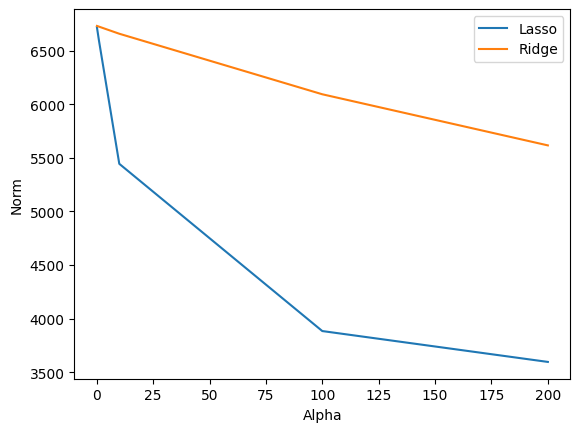

In [28]:
a = [0.1, 1, 10, 100, 200]
lasso_norm, ridge_norm = [], []
for reg in a:
    lasso = Lasso(reg).fit(X_train_norm, y_train)
    ridge = Ridge(reg).fit(X_train_norm, y_train)
    lasso_norm.append(np.linalg.norm(lasso.coef_))
    ridge_norm.append(np.linalg.norm(ridge.coef_))
plt.plot(a, lasso_norm, a, ridge_norm)
plt.xlabel("Alpha")
plt.ylabel("Norm")
plt.legend(["Lasso", "Ridge"])
plt.show()

При всех равных Lasso-регрессия более агрессивно уменьшает веса, чем Ridge-регрессия. 
Lasso ипользуют для отбора признаков, так как иногда с её помощью наименее значимые веса итоговой модели зануляются, и соответственно какие-то признаки уходят.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [29]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(cv=5, alphas=a).fit(X_train_norm, y_train)
mean_mse = np.mean(lasso_cv.mse_path_, axis=1)
print("alpha\tMSE")
for i in range(5):
    print(f"{lasso_cv.alphas_[i]}:\t{mean_mse[i]}")

alpha	MSE
200.0:	2178988.0928024454
100.0:	1804951.2300085805
10.0:	1353984.0899455375
1.0:	1294168.160491996
0.1:	1295689.1282917175


Выбираем alpha = 1.0, так как на нём минимальная ошибка.

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [30]:
lasso_res = Lasso(1.0).fit(X_train_norm, y_train)
lasso_res.coef_.astype(int)

array([ 5287,   -90,   -61, -1058,    -1,   -34,   158,   393,   320,
         293,   -76,   -97,  -194,  -354,  -435,  -523,   944,  1537,
         978,  1607,  1744,  1240,  1410])

*Объяснение для вещественных признаков:*

Из вещественных признаков наиболее весомыми оказались **carat** и **x**, а такие признаки как **depth**, **table**, **y** и **z** имеют малое влияние. Такое распределение кажется весьма логичным, так как основной описывающей характеристикой бриллианта является его вес (карат), который, возможно, зависит от длины бриллианта (х). Остальные числовые признаки редко используются при описании бриллианта.

*Объяснение для категориальных признаков:*

В признаке **cut** максимальные веса у категорий **Ideal, Premium, Very Good**. Это логично, так как чем лучше огранка камня, тем дороже его цена.

В признаке **color** у определенного цвета тем больше вес, чем чаще он встречается. Данное утверждение верно для всех цветов.

В признаке **clarity** коэффициенты имеют наиболее весомый вклад в стоимость бриллианта, чем у предыдущих категориальных признаков, так как это параметр определяет чистоту камня, что является одним из важных признаков для покупателя.

*Итог:*

Таким образом, наиболее информативными оказались признаки с наибольшими весами (**carat**, **x**, **clarity**), так как они дают понять, что имеет большее влияние на формирование цены камня, причем эти формирующие признаки вполне совпадают с теми, которые создают цену в реальной жизни.

Остальные признаки были не столь информативны.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [32]:
y_train_lasso_pred = lasso_res.predict(X_train_norm)
y_test_lasso_pred = lasso_res.predict(X_test_norm)

print("LinearRegression from 3.7")
print("Test")
print(mean_squared_error(y_test, y_test_pred), end="\n\n")
print("Coeff:", lr.coef_.astype(int))

print("\nLassoRegression with alpha = 1.0")
print("Test")
print(mean_squared_error(y_test, y_test_lasso_pred), end="\n\n")
print("Coeff:", lasso_res.coef_.astype(int))

LinearRegression from 3.7
Test
1244765.435715868

Coeff: [ 5338   -90   -60 -1100    -6   -34   170   414   339   310   -83  -104
  -202  -362  -442  -529   975  1611  1042  1670  1817  1284  1461]

LassoRegression with alpha = 1.0
Test
1243963.1436531865

Coeff: [ 5287   -90   -61 -1058    -1   -34   158   393   320   293   -76   -97
  -194  -354  -435  -523   944  1537   978  1607  1744  1240  1410]


В итоге получаем, что модель с Lasso-регрессией имеет меньшую ошибку, чем обычная линейна регрессия. В связи с этим лучше использовать модель с L1-регуляризацией.
Возможно, данная модель оказалась лучше, так как она уменьшила веса при всех признаках, тем самым сделав предсказание цены более точным.